## 500 Cities: Analysis

### Dataset:  Current Lack of Health Insurance among adults aged 18-64 years
Updated:  December 8, 2020
Data Provided by
Centers for Disease Control and Prevention, National Center for Chronic Disease Prevention and Health Promotion, Division of Population Health

2017 Data were provided by the Centers for Disease Control and Prevention (CDC), Division of Population Health, Epidemiology and Surveillance Branch. The project was funded by the Robert Wood Johnson Foundation (RWJF) in conjunction with the CDC Foundation. This is a filtered subset of the 500 Cities data that provides model-based small area estimates for 27 measures of chronic disease related to unhealthy behaviors (5), health outcomes (13), and use of preventive services (9). It represents a first-of-its kind effort to release information on a large scale for cities and for small areas within those cities. It includes estimates for the 500 largest US cities and approximately 28,000 census tracts within these cities. These estimates can be used to identify emerging health problems and to inform development and implementation of effective, targeted public health prevention activities. Because the small area model cannot detect effects due to local interventions, users are cautioned against using these estimates for program or policy evaluations. Data sources used to generate these measures include Behavioral Risk Factor Surveillance System (BRFSS) data (2017), Census Bureau 2010 census population data, and American Community Survey (ACS) 2013-2017 estimates. More information about the methodology can be found at www.cdc.gov/500cities.

In [1]:
#Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Remove the limit from the number of displayed columns.
pd.set_option('display.max_columns', None)

# Set the limit from the number of displayed rows
pd.set_option('display.max_rows', 200)


# To build linear regression_model
from sklearn.linear_model import LinearRegression

# to create standardized scalings
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import necessary libraries.
import warnings

warnings.filterwarnings("ignore")


In [2]:
# Read in Current Lack of Health Insurance data and print the # of columns and rows for input data
df = pd.read_csv("500_Cities__Current_lack_of_health_insurance_among_adults_aged_18-64_years.csv")
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  

# Setting the random seed to sample 10 rows
np.random.seed(1)
df.sample(n=10)

There are 28973 rows and 24 columns.


,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
20715,2017,OH,Ohio,Columbus,Census Tract,BRFSS,Prevention,3918000-39049007954,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,11.0,9.3,13.0,NaN,NaN,"7,659","(39.9926025621, -83.1399697744)",PREVENT,ACCESS2,3918000.0,3.904901e+10,Health Insurance
28123,2017,VA,Virginia,Virginia Beach,Census Tract,BRFSS,Prevention,5182000-51810045422,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,10.8,9.0,12.7,NaN,NaN,"4,972","(36.768838126, -76.0709236133)",PREVENT,ACCESS2,5182000.0,5.181005e+10,Health Insurance
2073,2017,CA,California,Fresno,Census Tract,BRFSS,Prevention,0627000-06019004802,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,22.9,19.5,26.3,NaN,NaN,"4,599","(36.7876302828, -119.822247622)",PREVENT,ACCESS2,627000.0,6.019005e+09,Health Insurance
3312,2017,CA,California,Los Angeles,Census Tract,BRFSS,Prevention,0644000-06037194500,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,5.8,4.7,7.6,NaN,NaN,"2,037","(34.0781752094, -118.369595805)",PREVENT,ACCESS2,644000.0,6.037194e+09,Health Insurance
12938,2017,KS,Kansas,Lawrence,Census Tract,BRFSS,Prevention,2038900-20045000501,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,13.7,10.9,16.8,NaN,NaN,"3,225","(38.9806714754, -95.2497990874)",PREVENT,ACCESS2,2038900.0,2.004500e+10,Health Insurance
12792,2017,KS,Kansas,Wichita,Census Tract,BRFSS,Prevention,2079000-20173010115,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,9.3,8.4,10.3,NaN,NaN,"6,943","(37.7191754925, -97.1960576406)",PREVENT,ACCESS2,2079000.0,2.017301e+10,Health Insurance
2684,2017,CA,California,Los Angeles,Census Tract,BRFSS,Prevention,0644000-06037195600,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,15.6,12.4,19.1,NaN,NaN,"3,340","(34.0808254216, -118.265548243)",PREVENT,ACCESS2,644000.0,6.037196e+09,Health Insurance
21615,2017,OK,Oklahoma,Oklahoma City,Census Tract,BRFSS,Prevention,4055000-40109108526,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,14.8,12.9,17.1,NaN,NaN,"4,965","(35.5631627946, -97.6655279765)",PREVENT,ACCESS2,4055000.0,4.010911e+10,Health Insurance
22013,2017,OK,Oklahoma,Tulsa,Census Tract,BRFSS,Prevention,4075000-40143000500,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,27.0,24.1,30.0,NaN,NaN,"2,333","(36.1860350185, -95.9685925719)",PREVENT,ACCESS2,4075000.0,4.014300e+10,Health Insurance
6558,2017,CA,California,Stockton,Census Tract,BRFSS,Prevention,0675000-06077003208,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,12.0,10.5,13.6,NaN,NaN,"12,082","(38.0475686382, -121.337991454)",PREVENT,ACCESS2,675000.0,6.077003e+09,Health Insurance


In [3]:
df.head()  # Check head of dataset

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,US,United States,NaN,US,BRFSS,Prevention,59,Current lack of health insurance among adults ...,%,AgeAdjPrv,Age-adjusted prevalence,15.2,14.9,15.5,NaN,NaN,"308,745,538",NaN,PREVENT,ACCESS2,NaN,NaN,Health Insurance
1,2017,FL,Florida,Palm Coast,City,BRFSS,Prevention,1254200,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,19.7,19.0,20.4,NaN,NaN,"75,180","(29.5405590976, -81.2508206143)",PREVENT,ACCESS2,1254200.0,NaN,Health Insurance
2,2017,CA,California,Vacaville,City,BRFSS,Prevention,0681554,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,11.3,10.9,11.8,NaN,NaN,"92,428","(38.3597235063, -121.96903046)",PREVENT,ACCESS2,681554.0,NaN,Health Insurance
3,2017,IL,Illinois,Bolingbrook,City,BRFSS,Prevention,1707133,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,13.6,13.1,14.1,NaN,NaN,"73,366","(41.6911653908, -88.1011218035)",PREVENT,ACCESS2,1707133.0,NaN,Health Insurance
4,2017,MN,Minnesota,Duluth,City,BRFSS,Prevention,2717000,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,10.7,10.2,11.2,NaN,NaN,"86,265","(46.7854703427, -92.1342013763)",PREVENT,ACCESS2,2717000.0,NaN,Health Insurance


In [4]:
df.tail()  # Check tail of dataset

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
28968,2017,WY,Wyoming,Cheyenne,Census Tract,BRFSS,Prevention,5613900-56021000600,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,16.6,14.3,19.2,NaN,NaN,"5,968","(41.1398184857, -104.783033115)",PREVENT,ACCESS2,5613900.0,5.602100e+10,Health Insurance
28969,2017,WI,Wisconsin,Madison,Census Tract,BRFSS,Prevention,5548000-55025002100,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,8.5,7.0,10.5,NaN,NaN,"4,805","(43.1043148984, -89.3549227492)",PREVENT,ACCESS2,5548000.0,5.502500e+10,Health Insurance
28970,2017,WA,Washington,Tacoma,Census Tract,BRFSS,Prevention,5370000-53053062802,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,12.6,11.1,14.2,NaN,NaN,"4,097","(47.1939936737, -122.496412414)",PREVENT,ACCESS2,5370000.0,5.305306e+10,Health Insurance
28971,2017,WA,Washington,Tacoma,Census Tract,BRFSS,Prevention,5370000-53053060400,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,6.9,5.5,8.6,NaN,NaN,"3,896","(47.2899058089, -122.485972133)",PREVENT,ACCESS2,5370000.0,5.305306e+10,Health Insurance
28972,2017,WI,Wisconsin,Milwaukee,Census Tract,BRFSS,Prevention,5553000-55079008100,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,22.6,19.6,25.6,NaN,NaN,"1,331","(43.0674717825, -87.9074383666)",PREVENT,ACCESS2,5553000.0,5.507901e+10,Health Insurance


In [5]:
# check data types and count of entries for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28973 entries, 0 to 28972
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        28973 non-null  int64  
 1   StateAbbr                   28973 non-null  object 
 2   StateDesc                   28973 non-null  object 
 3   CityName                    28971 non-null  object 
 4   GeographicLevel             28973 non-null  object 
 5   DataSource                  28973 non-null  object 
 6   Category                    28973 non-null  object 
 7   UniqueID                    28973 non-null  object 
 8   Measure                     28973 non-null  object 
 9   Data_Value_Unit             28973 non-null  object 
 10  DataValueTypeID             28973 non-null  object 
 11  Data_Value_Type             28973 non-null  object 
 12  Data_Value                  28211 non-null  float64
 13  Low_Confidence_Limit        282

Observations:
- There are 29006 rows and 24 columns for this dataset
- StateAbbr, StateDesc, CityName, GeographicLevel, DataSource, Category, UniqueID, Measure, Data_Value_Unit, DataValueTypeID, Data_Value_Footnote_Symbol, Data_Value_Footnote, Data_Value_Footnote, PopulationCount, GeoLocation, CategoryID, MeasureId, and Short_Question_Text are strings.      
- Year, Data_Value, Low_Confidence_Limit, High_Confidence_Limit, CityFIPS, and TractFIPS are numeric.
- There are missing values for columns 3, 12 - 16, 18, 21 - 22.
- PopulationCount should be numeric. There should be only five numeric columns:  Year, Data_Value, Low_Confidence_Limit,High_Confidence_Limit, PopulationCount.

In [6]:
# Convert objects to Numeric or Category
df['PopulationCount_replace'] = df['PopulationCount'].str.replace(',','')
df['PopulationCount'] = pd.to_numeric(df['PopulationCount_replace'])

df['PopulationCount_replace']

# Drop  column from the df
df.drop(columns=['PopulationCount_replace'], inplace=True)

df['CityFIPS'] = df['CityFIPS'].astype('category')
df['TractFIPS'] = df['TractFIPS'].astype('category')

In [7]:
#Confirm edits
df.head(2)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,US,United States,NaN,US,BRFSS,Prevention,59,Current lack of health insurance among adults ...,%,AgeAdjPrv,Age-adjusted prevalence,15.2,14.9,15.5,NaN,NaN,308745538,NaN,PREVENT,ACCESS2,NaN,NaN,Health Insurance
1,2017,FL,Florida,Palm Coast,City,BRFSS,Prevention,1254200,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,19.7,19.0,20.4,NaN,NaN,75180,"(29.5405590976, -81.2508206143)",PREVENT,ACCESS2,1254200.0,NaN,Health Insurance


In [8]:
# Which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

Data_Value_Footnote           28211
Data_Value_Footnote_Symbol    28211
TractFIPS                      1002
High_Confidence_Limit           762
Low_Confidence_Limit            762
Data_Value                      762
CityFIPS                          2
GeoLocation                       2
CityName                          2
Short_Question_Text               0
UniqueID                          0
StateAbbr                         0
StateDesc                         0
GeographicLevel                   0
DataSource                        0
Category                          0
Data_Value_Type                   0
Measure                           0
Data_Value_Unit                   0
DataValueTypeID                   0
PopulationCount                   0
CategoryID                        0
MeasureId                         0
Year                              0
dtype: int64

Observations:
- The Data_Value_Footnote and Data_Value_Footnote_Symbol are missing for most rows.
- The Data_Value, High_Confidence_Limit, and Low_Confidence_Limit are missing for exactly 794 rows.
- The GeoLocation and CityName are missing for exactly two rows - this is for the total US values.

In [9]:
#count the number of unique values in each column
df.nunique()

Year                              1
StateAbbr                        52
StateDesc                        52
CityName                        474
GeographicLevel                   3
DataSource                        1
Category                          1
UniqueID                      28472
Measure                           1
Data_Value_Unit                   1
DataValueTypeID                   2
Data_Value_Type                   2
Data_Value                      519
Low_Confidence_Limit            463
High_Confidence_Limit           563
Data_Value_Footnote_Symbol        1
Data_Value_Footnote               1
PopulationCount                8050
GeoLocation                   28471
CategoryID                        1
MeasureId                         1
CityFIPS                        500
TractFIPS                     27618
Short_Question_Text               1
dtype: int64

Observations:
- There are 52 state abbreviations: 50 states plus DC and US.
- There are 474 City Names - not 500! This is interesting since there are only 2 rows missing the CityName value.
- There are only 3 GeographicLevels: Census_Tract, City, and US.
- There are 28,505 Unique IDs.
- There are 256 Data values, 239 Low Confidence Limit values, and 277 High Confidence Limit values.
- There are 8050 unique Population Counts.
- There are 28505 GeoLocation values!

In [10]:
# Get the 5 number summary of all of the columns
df.describe(include="all")

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
count,28973.0,28973,28973,28971,28973,28973,28973,28973,28973,28973,28973,28973,28211.000000,28211.000000,28211.000000,762,762,2.897300e+04,28971,28973,28973,28971.0,2.797100e+04,28973
unique,NaN,52,52,474,3,1,1,28472,1,1,2,2,NaN,NaN,NaN,1,1,NaN,28471,1,1,500.0,2.761800e+04,1
top,NaN,CA,California,New York,Census Tract,BRFSS,Prevention,4807000,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,NaN,NaN,NaN,*,Estimates suppressed for population less than 50,NaN,"(33.7352277311, -116.994605005)",PREVENT,ACCESS2,3651000.0,6.059063e+09,Health Insurance
freq,NaN,5601,5601,2141,27971,28973,28973,2,28973,28973,28472,28472,NaN,NaN,NaN,762,762,NaN,2,28973,28973,2141.0,3.000000e+00,28973
mean,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.965003,14.566318,19.571500,NaN,NaN,3.197989e+04,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.791645,7.843115,9.661654,NaN,NaN,2.566725e+06,NaN,NaN,NaN,NaN,NaN,NaN
min,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.400000,2.300000,2.500000,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.400000,8.700000,12.300000,NaN,NaN,2.400000e+03,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,12.800000,17.400000,NaN,NaN,3.629000e+03,NaN,NaN,NaN,NaN,NaN,NaN
75%,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.500000,18.600000,24.600000,NaN,NaN,5.038000e+03,NaN,NaN,NaN,NaN,NaN,NaN


Observations:
- Data hase only a 2017 timestamp.
- There is a huge variance in PopulationCount.
- The Data_Value ranges from 2.4 to 57.8 with a median of 15.0 and mean of 16.9.

## Exploratory Data Analysis

### Univariate

In [11]:
# Look at central tendency and dispersion with a function that 1. inputs numerical column and 2. outputs boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2)  # setting the font scale for seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,           # Number of rows of the subplot grid=2
        sharex=True,       # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )                      # creating 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="lightgrey"
    )                      # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )                      # For histogram
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )                      # Add the mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )                      # Add the median to the histogram

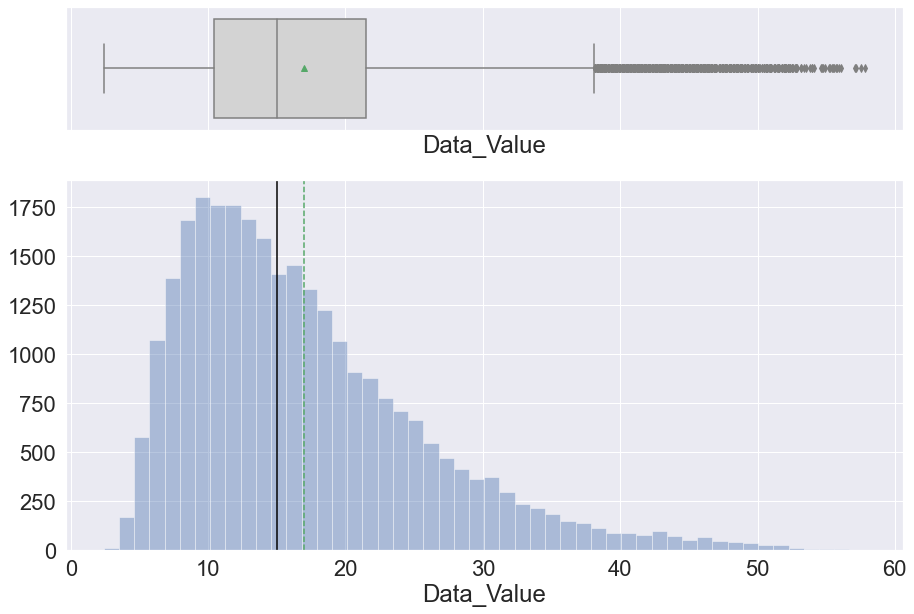

In [12]:
# Let's explore the dependent variable - the Data_Value
histogram_boxplot(df.Data_Value)

Observation:
- The Current Lack of Health Insurance value is left skewed with some right outliers.
- The Lack of Health Insurance peaks at 10%, but there is a median of 15.0% and mean of 16.9%. This means that on average 16.9% of the population has no current health insurance for adults between 18-64 years.

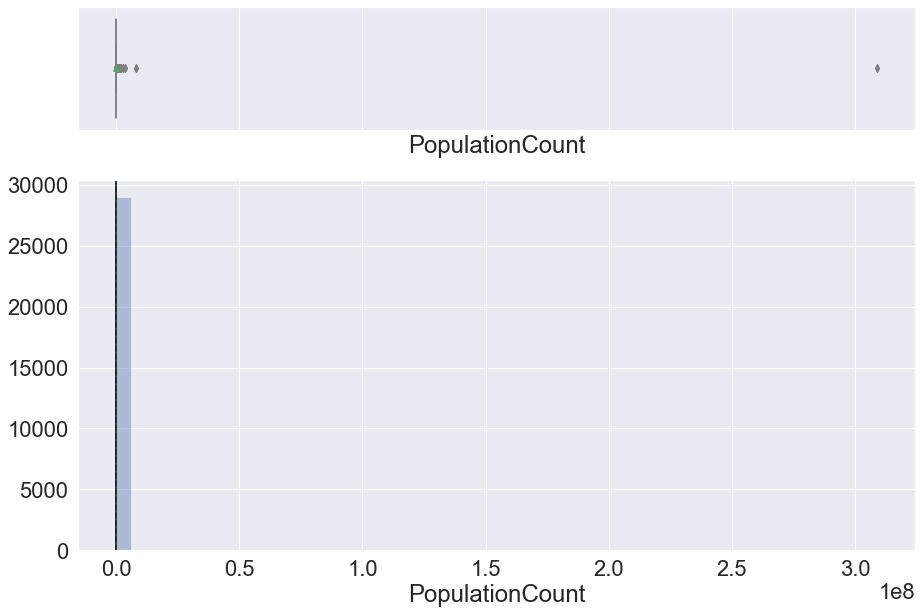

In [13]:
# Let's explore the independent variable - the PopulationCount
histogram_boxplot(df.PopulationCount)

Observation:
There is an outlier in the PopulationCount around 300 million. Let's explore these large population values.

In [14]:
# List the outliers greater than 100 million
df[df["PopulationCount"] > 10000000]

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,US,United States,NaN,US,BRFSS,Prevention,59,Current lack of health insurance among adults ...,%,AgeAdjPrv,Age-adjusted prevalence,15.2,14.9,15.5,NaN,NaN,308745538,NaN,PREVENT,ACCESS2,NaN,NaN,Health Insurance
176,2017,US,United States,NaN,US,BRFSS,Prevention,59,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,14.7,14.4,15.0,NaN,NaN,308745538,NaN,PREVENT,ACCESS2,NaN,NaN,Health Insurance


Observations:
- The large population values are totals for the United States.
- One value is for a crude prevalence value and the other is an age adjusted prevalence value.

In [15]:
# Function to create labeled barplots

def barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe, feature: dataframe column, perc: whether to display percentages instead of
    count (default is False), n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

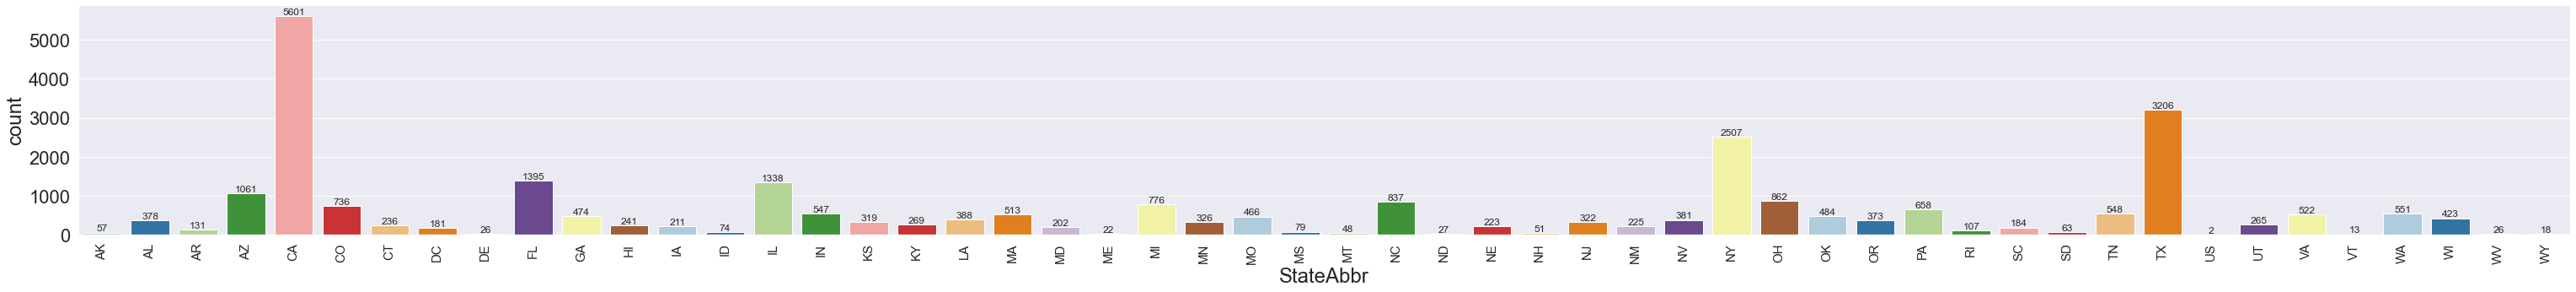

In [16]:
# Plot the categorical data
barplot(df,'StateAbbr')

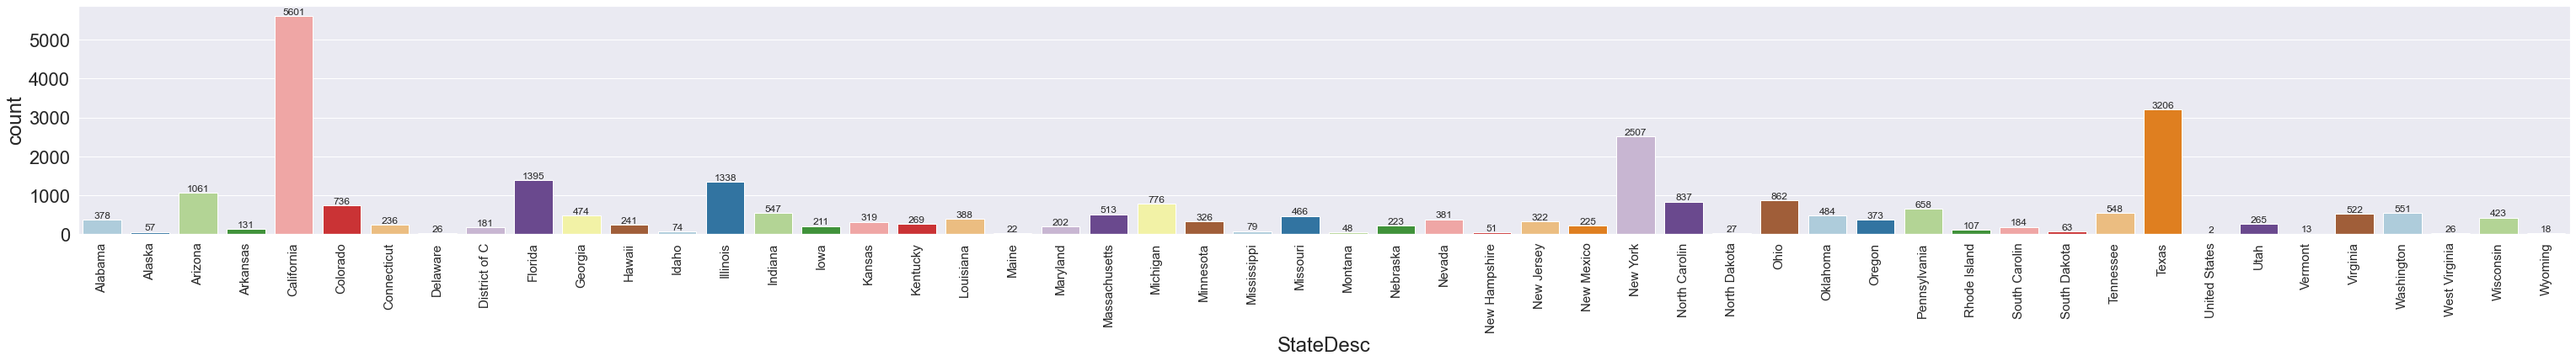

In [17]:
# Plot the categorical data
barplot(df,'StateDesc')

Observations:
- California, Texas, and New York have the largest value counts in descending order.
- Datesets 1 and 2 on Physical Activity and Physical Health appear consistent in terms of sampling.

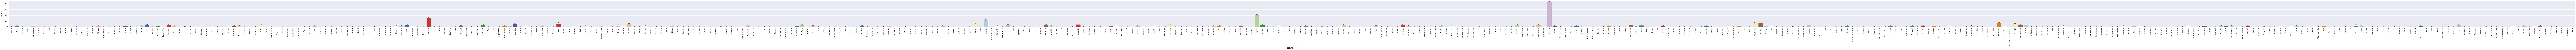

In [18]:
# Plot the categorical data
barplot(df,'CityName')

Observations:
As expected the largest U.S. cities have the largest value counts:  New York, Los Angeles, Chicago, and Houston.

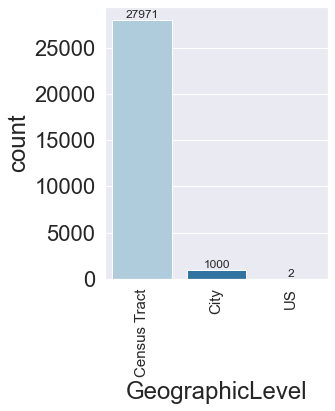

In [19]:
# Plot the categorical data
barplot(df,'GeographicLevel')

Observations:
Most of the data has been collected from the Census

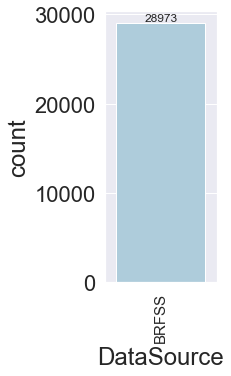

In [20]:
# Plot the categorical data
barplot(df,'DataSource')

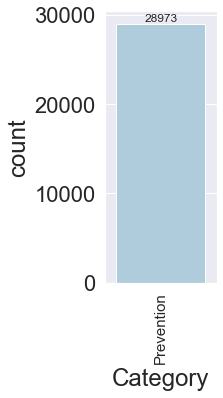

In [21]:
# Plot the categorical data
barplot(df,'Category')

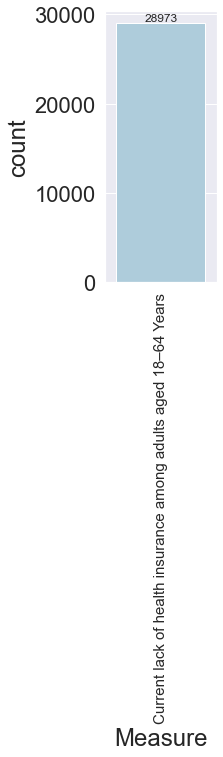

In [22]:
# Plot the categorical data
barplot(df,'Measure')

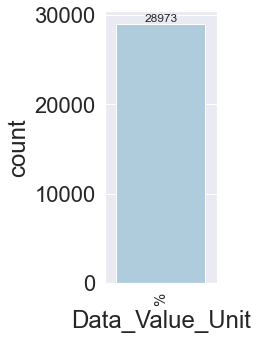

In [23]:
# Plot the categorical data
barplot(df,'Data_Value_Unit')

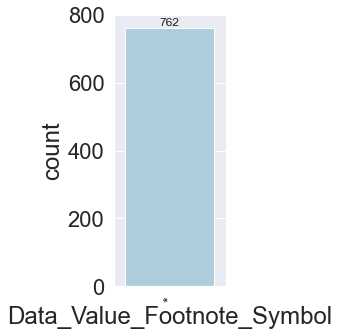

In [24]:
# Plot the categorical data
barplot(df,'Data_Value_Footnote_Symbol')

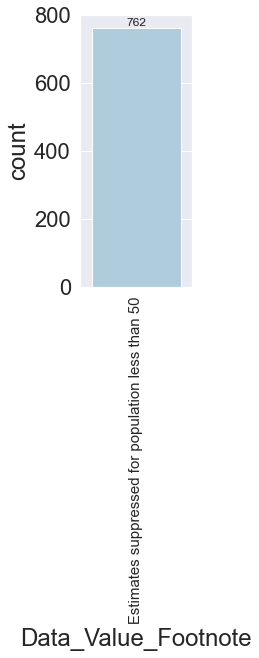

In [25]:
# Plot the categorical data
barplot(df,'Data_Value_Footnote')

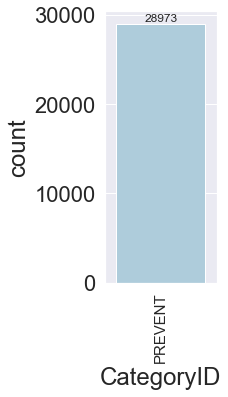

In [26]:
# Plot the categorical data
barplot(df,'CategoryID')

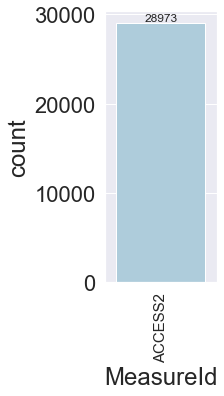

In [27]:
# Plot the categorical data
barplot(df,'MeasureId')

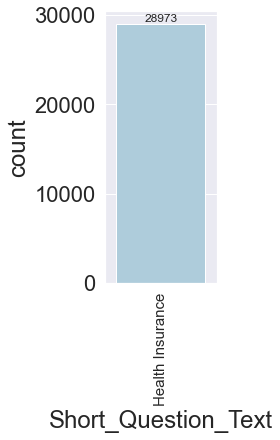

In [28]:
# Plot the categorical data
barplot(df,'Short_Question_Text')

Observation:  All data is from the BRFSS source, Category, Measure, Data_Value_Unit, Data_Value_Footnote_Symbol, Data_Value_Footnote, CategoryID, MeasureId, and Short_Question_Text.

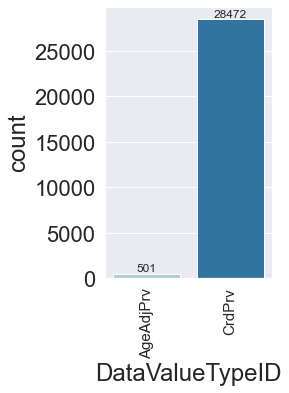

In [29]:
# Plot the categorical data
barplot(df,'DataValueTypeID')

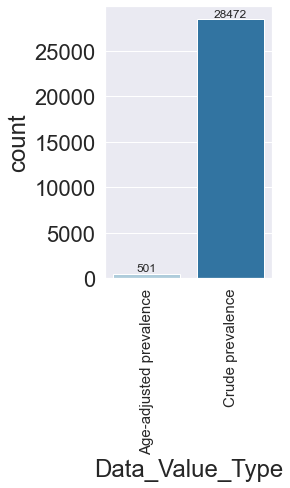

In [30]:
# Plot the categorical data
barplot(df,'Data_Value_Type')

Observations:  
- Most data is a Crude Prevalence Value. 501 rows have age adjusted values. These are estimates for the 500 largest US cities and approximately 28,000 census tracts within these cities.
- Let's explore some the Age-Adjusted value data.

In [31]:
# List the 
df_AgeAdj= df[df["DataValueTypeID"] == 'AgeAdjPrv']
df[df["DataValueTypeID"] == 'AgeAdjPrv']

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,US,United States,NaN,US,BRFSS,Prevention,59,Current lack of health insurance among adults ...,%,AgeAdjPrv,Age-adjusted prevalence,15.2,14.9,15.5,NaN,NaN,308745538,NaN,PREVENT,ACCESS2,NaN,NaN,Health Insurance
5,2017,MO,Missouri,Springfield,City,BRFSS,Prevention,2970000,Current lack of health insurance among adults ...,%,AgeAdjPrv,Age-adjusted prevalence,16.2,15.8,16.6,NaN,NaN,159498,"(37.1942661484, -93.2914273656)",PREVENT,ACCESS2,2970000.0,NaN,Health Insurance
9,2017,ND,North Dakota,Fargo,City,BRFSS,Prevention,3825700,Current lack of health insurance among adults ...,%,AgeAdjPrv,Age-adjusted prevalence,9.8,9.3,10.3,NaN,NaN,105549,"(46.8652457832, -96.8289882328)",PREVENT,ACCESS2,3825700.0,NaN,Health Insurance
11,2017,OH,Ohio,Columbus,City,BRFSS,Prevention,3918000,Current lack of health insurance among adults ...,%,AgeAdjPrv,Age-adjusted prevalence,11.4,11.3,11.5,NaN,NaN,787033,"(39.9859500484, -82.9851738516)",PREVENT,ACCESS2,3918000.0,NaN,Health Insurance
12,2017,OK,Oklahoma,Broken Arrow,City,BRFSS,Prevention,4009050,Current lack of health insurance among adults ...,%,AgeAdjPrv,Age-adjusted prevalence,13.5,13.1,13.9,NaN,NaN,98850,"(36.0366324911, -95.7809572414)",PREVENT,ACCESS2,4009050.0,NaN,Health Insurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28716,2017,WI,Wisconsin,Green Bay,City,BRFSS,Prevention,5531000,Current lack of health insurance among adults ...,%,AgeAdjPrv,Age-adjusted prevalence,12.7,12.3,13.2,NaN,NaN,104057,"(44.5149847816, -87.9896195955)",PREVENT,ACCESS2,5531000.0,NaN,Health Insurance
28858,2017,WV,West Virginia,Charleston,City,BRFSS,Prevention,5414600,Current lack of health insurance among adults ...,%,AgeAdjPrv,Age-adjusted prevalence,10.9,10.4,11.3,NaN,NaN,51400,"(38.3484079736, -81.632165003)",PREVENT,ACCESS2,5414600.0,NaN,Health Insurance
28889,2017,WI,Wisconsin,Appleton,City,BRFSS,Prevention,5502375,Current lack of health insurance among adults ...,%,AgeAdjPrv,Age-adjusted prevalence,10.0,9.5,10.4,NaN,NaN,72623,"(44.2776987457, -88.3897664444)",PREVENT,ACCESS2,5502375.0,NaN,Health Insurance
28931,2017,WY,Wyoming,Cheyenne,City,BRFSS,Prevention,5613900,Current lack of health insurance among adults ...,%,AgeAdjPrv,Age-adjusted prevalence,16.3,15.5,17.0,NaN,NaN,59466,"(41.1460804265, -104.789064332)",PREVENT,ACCESS2,5613900.0,NaN,Health Insurance


In [32]:
# Get the 5 number summary of all of the columns
df_AgeAdj.describe(include="all")

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
count,501.0,501,501,500,501,501,501,501,501,501,501,501,501.000000,501.000000,501.000000,0,0,5.010000e+02,500,501,501,500.0,0,501
unique,NaN,52,52,474,2,1,1,501,1,1,1,1,NaN,NaN,NaN,0,0,NaN,500,1,1,500.0,0,1
top,NaN,CA,California,Bloomington,City,BRFSS,Prevention,0669070,Current lack of health insurance among adults ...,%,AgeAdjPrv,Age-adjusted prevalence,NaN,NaN,NaN,NaN,NaN,NaN,"(40.7260693449, -74.1752997118)",PREVENT,ACCESS2,5613900.0,NaN,Health Insurance
freq,NaN,121,121,3,500,501,501,1,501,501,501,501,NaN,NaN,NaN,NaN,NaN,NaN,1,501,501,1.0,NaN,501
mean,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.306587,15.813174,16.808383,NaN,NaN,8.218889e+05,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.266104,6.133892,6.395774,NaN,NaN,1.379210e+07,NaN,NaN,NaN,NaN,NaN,NaN
min,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.800000,4.600000,5.100000,NaN,NaN,4.241700e+04,NaN,NaN,NaN,NaN,NaN,NaN
25%,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,11.500000,12.500000,NaN,NaN,8.160100e+04,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.100000,14.700000,15.500000,NaN,NaN,1.061140e+05,NaN,NaN,NaN,NaN,NaN,NaN
75%,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.400000,18.800000,20.000000,NaN,NaN,1.813760e+05,NaN,NaN,NaN,NaN,NaN,NaN


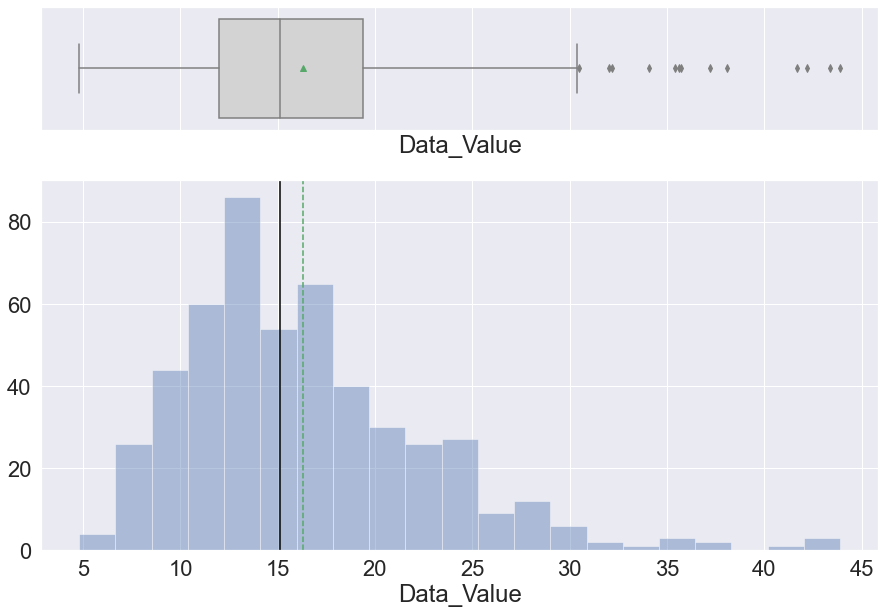

In [33]:
# Let's explore the dependent variable - the Data_Value
histogram_boxplot(df_AgeAdj.Data_Value)

## Observations:
- The Current Lack of Health Insurance value for the age adjusted counts have a median of 15.1 and a mean of 16.3. The distribution is left skewed with several right outliers.
- This means that for the 500 largest U.S. cities, 15% of the population has no current health insurance for adults aged 18-64 years.

## Conclusions

- There are 52 state abbreviations: 50 states plus DC and US.
- There are 474 City Names - not 500! This is interesting since there are only 2 rows missing the CityName value.
- The two rows missing CityName are the total U.S. population rows. One value is for a crude prevalence value and the other is an age adjusted prevalence value.
- There are only 3 GeographicLevels: Census_Tract, City, and US.
- There are 28,505 Unique IDs.
- Most data is a Crude Prevalence Value. **501 rows have age adjusted values.** These are estimates for the 500 largest US cities and approximately 28,000 census tracts within these cities.
- When adjusting for age, the Current lack of Health Insurance value for the 500 largest cities is 15%. This means that 15% of the U.S. population has no current health insurance for adults aged 18-64 years.